#  The task is to identify if the tweets have a negative sentiment towards such companies or products.

### Understanding the data:

- Variables 
- Data sets
- Representation [what data represent]

### Understand the domain knoweldge what the Business questions, what's the right type of data and what's the wrong type of data collected.

https://thecleverprogrammer.com/2021/02/19/text-emotions-detection-with-machine-learning/

https://medium.com/analytics-vidhya/song-recommendation-based-on-textual-and-facial-emotion-recognition-a95e6259c5d8

- Sentiment Analysis considered to be one of the common Natural Langauge Processing NLP main problems that depend on 
- One of the main concepts used is:
-  Regular Expression (RegEx)

- Text is the most unstructured form of all the available data. I will include some techniques like lemmatization, stemming, parts of speech tagging and dependency parsing.

Techniques:

- Tokenization
- Text Normalization
- Parts-of-Speech Tagging
- Dependency Parsing




- **Packages I used:**

Pandas - Numpy - MatPlotLib - Scipy - Pillow - WordCloud - PIL - re - Seaborn - NLTK

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import re

In [2]:
#recal the data set
df = pd.read_csv('train_2kmZucJ.csv')

In [3]:
#checking the shape of the data
print('Shape of the dataset (NO. of rows, No. of columns):', df.shape)

Shape of the dataset (NO. of rows, No. of columns): (7920, 3)


In [4]:
df.drop(['id'], axis = 1, inplace =True )

In [5]:
#change the tweet column type to string
df = df.astype({'tweet':'string'})
print(df.dtypes)

label     int64
tweet    string
dtype: object


In [6]:
df.head(3)

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...


### 1 Removing Twitter Handles (@user)

In [7]:
def remove_users(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i,'', input_text)
    return input_text

In [8]:
df['tidy_tweets'] = np.vectorize(remove_users)(df['tweet'], "@[\w]*")

In [9]:
df = df.astype({'tidy_tweets':'string'}) # It worked
print(df.dtypes)

label           int64
tweet          string
tidy_tweets    string
dtype: object


### Remove the URL 

In [10]:
df['tidy_tweets'] = df['tidy_tweets'].str.replace(r'http\S+', '', regex=True).str.replace(r'www\S+', '', regex=True)

In [11]:
df.head(3)

,label,tweet,tidy_tweets
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps #...
1,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...


### 2. Removing Punctuations, Numbers, and Special Characters

In [12]:
df['tidy_tweets'] = df['tidy_tweets'].str.replace("[^a-zA-Z#]", " ")

/tmp/ipykernel_134134/1984675455.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tidy_tweets'] = df['tidy_tweets'].str.replace("[^a-zA-Z#]", " ")


In [13]:
df.head(3)

,label,tweet,tidy_tweets
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps #...
1,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,0,We love this! Would you go? #talk #makememorie...,We love this Would you go #talk #makememorie...


### 3. Removing Short Words "check this one as it's not ideal technqiue!" it has removed the IOS7 - can't - my words

In [14]:
df['tidy_tweets'] = df['tidy_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
#it removes short words like LOL, lol, hmm, etc.

In [15]:
df.head(3)

,label,tweet,tidy_tweets
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps #b...
1,0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...


### Remove Hastage symbol from the cleaned text

In [16]:
df['tidy_tweets'] = df['tidy_tweets'].str.strip("#")
df['tidy_tweets'] = df['tidy_tweets'].str.replace("_", " ").str.replace("#"," ")

In [17]:
df.head(3)

,label,tweet,tidy_tweets
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test android apps be...
1,0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,0,We love this! Would you go? #talk #makememorie...,love this Would talk makememories unplug r...


### make the new cleaned column lowercase

In [18]:
df['tidy_tweets'] = df['tidy_tweets'].str. lower() 

In [19]:
df.head(3)

,label,tweet,tidy_tweets
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps be...
1,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,0,We love this! Would you go? #talk #makememorie...,love this would talk makememories unplug r...


### 4. Tokenization

In [20]:
tokenized_tweets = df['tidy_tweets'].apply(lambda x: x.split())
tokenized_tweets

0       [fingerprint, pregnancy, test, android, apps, ...
1       [finally, transparant, silicon, case, thanks, ...
2       [love, this, would, talk, makememories, unplug...
3       [wired, know, george, made, that, iphone, cute...
4       [what, amazing, service, apple, even, talk, ab...
                              ...                        
7915    [live, loud, lol, liveoutloud, selfie, smile, ...
7916    [would, like, wish, amazing, make, every, minu...
7917    [helping, lovely, year, neighbor, with, ipad, ...
7918    [finally, smart, pocket, wifi, stay, connected...
7919    [apple, barcelona, apple, store, bcn, barcelon...
Name: tidy_tweets, Length: 7920, dtype: object

In [21]:
df

,label,tweet,tidy_tweets
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps be...
1,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,0,We love this! Would you go? #talk #makememorie...,love this would talk makememories unplug r...
3,0,I'm wired I know I'm George I was made that wa...,wired know george made that iphone cute dav...
4,1,What amazing service! Apple won't even talk to...,what amazing service apple even talk about que...
...,...,...,...
7915,0,Live out loud #lol #liveoutloud #selfie #smile...,live loud lol liveoutloud selfie smile so...
7916,0,We would like to wish you an amazing day! Make...,would like wish amazing make every minute coun...
7917,0,Helping my lovely 90 year old neighbor with he...,helping lovely year neighbor with ipad this mo...
7918,0,Finally got my #smart #pocket #wifi stay conne...,finally smart pocket wifi stay connected an...


### 5. Stemming

* Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.



* I have highlighted the process of stemming but I'm not going with any further as I want for this model to reflect the accurate context of the data. Simply the task is about identifying the hatred/non-hatred tweets but I want to extend the analysis to count the most repeatative words, in order to move my model to identent classification. 

In [22]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

#stemming
tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_tweets.head(5)

0    [fingerprint, pregnanc, test, android, app, be...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, talk, makememori, unplug, r...
3    [wire, know, georg, made, that, iphon, cute, d...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: tidy_tweets, dtype: object

Now let’s stitch these tokens back together.



In [23]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

df['tokenized_tweets'] = tokenized_tweets

In [24]:
df['tokenized_tweets']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love thi would talk makememori unplug relax ip...
3       wire know georg made that iphon cute daventri ...
4       what amaz servic appl even talk about question...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz make everi minut count tl...
7917    help love year neighbor with ipad thi morn jus...
7918    final smart pocket wifi stay connect anytim an...
7919    appl barcelona appl store bcn barcelona travel...
Name: tokenized_tweets, Length: 7920, dtype: object

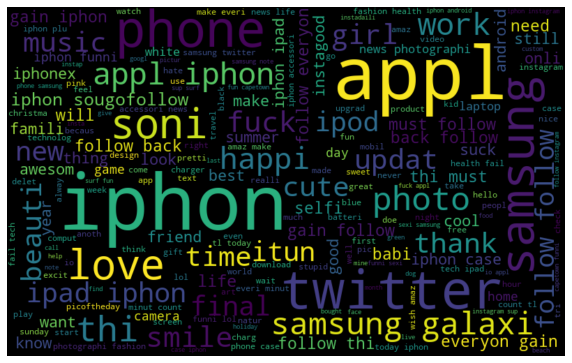

In [25]:
all_words = ' '.join([text for text in df['tokenized_tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

import matplotlib.pyplot as pl

pl.figure(figsize=(10, 7))
pl.imshow(wordcloud, interpolation="bilinear")
pl.axis('off')
pl.show()

## As you can see here the Stemming technique isn't accurate, I prefer to use Lemmaization technique for text data.

## The accurate pattern is Lemmaization

In [26]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['lemm'] = df['tidy_tweets'].apply(wordnet_lem.lemmatize)

### Compare between the original text, stemming & lemmaization techniques:

In [27]:
df['tidy_tweets'].head(3).to_list()   #Clean plain text after wrangling


['fingerprint  pregnancy test  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone',
 'finally transparant silicon case thanks uncle  yay  sony  xperia  sonyexperias',
 'love this would  talk  makememories  unplug  relax  iphone  smartphone  wifi  connect']

In [28]:
df['tokenized_tweets'].head(3).to_list()   #Stemming technique


['fingerprint pregnanc test android app beauti cute health iger iphoneonli iphonesia iphon',
 'final transpar silicon case thank uncl yay soni xperia sonyexperia',
 'love thi would talk makememori unplug relax iphon smartphon wifi connect']

In [29]:
df['lemm'].head(3).to_list()    #Lemmaization


['fingerprint  pregnancy test  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone',
 'finally transparant silicon case thanks uncle  yay  sony  xperia  sonyexperias',
 'love this would  talk  makememories  unplug  relax  iphone  smartphone  wifi  connect']

## Now I can use hot encoding to count the words, check the tone and visualize the data properly

## Sentiment Analysis using TextBlob:


In [30]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
    def getPolarity(review):
        return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [31]:
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

!pip install textblob

In [32]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
df['Polarity'] = df['lemm'].apply(getPolarity) 
df['Analysis'] = df['Polarity'].apply(analysis)
df.head(30)

,label,tweet,tidy_tweets,tokenized_tweets,lemm,Polarity,Analysis
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps be...,fingerprint pregnanc test android app beauti c...,fingerprint pregnancy test android apps be...,0.675000,Positive
1,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...,final transpar silicon case thank uncl yay son...,finally transparant silicon case thanks uncle ...,0.100000,Positive
2,0,We love this! Would you go? #talk #makememorie...,love this would talk makememories unplug r...,love thi would talk makememori unplug relax ip...,love this would talk makememories unplug r...,0.500000,Positive
3,0,I'm wired I know I'm George I was made that wa...,wired know george made that iphone cute dav...,wire know georg made that iphon cute daventri ...,wired know george made that iphone cute dav...,0.500000,Positive
4,1,What amazing service! Apple won't even talk to...,what amazing service apple even talk about que...,what amaz servic appl even talk about question...,what amazing service apple even talk about que...,-0.100000,Negative
5,1,iPhone software update fucked up my phone big ...,iphone software update fucked phone time stupi...,iphon softwar updat fuck phone time stupid iphon,iphone software update fucked phone time stupi...,-0.700000,Negative
6,0,Happy for us .. #instapic #instadaily #us #son...,happy instapic instadaily sony xperia xpe...,happi instap instadaili soni xperia xperiaz,happy instapic instadaily sony xperia xpe...,0.800000,Positive
7,0,New Type C charger cable #UK http://www.ebay.c...,type charger cable bay amazon etsy year ro...,type charger cabl bay amazon etsi year rob cro...,type charger cable bay amazon etsy year ro...,0.033333,Positive
8,0,Bout to go shopping again listening to music #...,bout shopping again listening music iphone j...,bout shop again listen music iphon justm music...,bout shopping again listening music iphone j...,0.000000,Neutral
9,0,Photo: #fun #selfie #pool #water #sony #camera...,photo fun selfie pool water sony camera ...,photo fun selfi pool water soni camera picofth...,photo fun selfie pool water sony camera ...,0.400000,Positive


In [33]:
tb_counts = df.Analysis.value_counts()

tb_counts

Positive    3912
Neutral     2671
Negative    1337
Name: Analysis, dtype: int64

In [34]:
dd = df.groupby("lemm")['Analysis'].count()
dd

lemm
                                                                                                         1
aand probably just lost everything itunes well phone  fuckfuckfuck  yourefuckingidiots                   1
aaron woods swing  news  photography  fashion  health  fail  tech  ipad  iphone  funny  lol              1
aashamsakal  lordsiva wish happy sivaratri  lord  iphone  apps  ipad  love  siva                         1
aboard envy flip phone  newphone  iphone  iphone  upgraded  technology                                   1
                                                                                                        ..
zapio athens greece follow more photos  world  travel  nikon  samsung twitter kfusnmgp                   1
zealand flight lands safely  news  photography  fashion  health  fail  tech  ipad  iphone  funny  lol    1
zebra love your  ipad  iphone free economy shipping orders code                                          1
zegna that  fit  your  clothes  

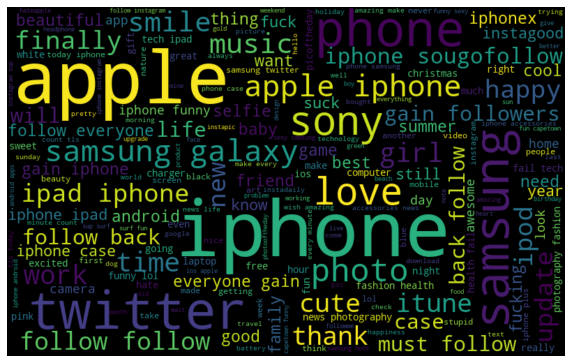

In [35]:
all_words = ' '.join([text for text in df['lemm']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

import matplotlib.pyplot as pl

pl.figure(figsize=(10, 7))
pl.imshow(wordcloud, interpolation="bilinear")
pl.axis('off')
pl.show()

!pip install keras

#Install package using pip
!pip install text2emotion

In [41]:
#Import the modules
import text2emotion as te

In [44]:
ddff = te.get_emotion(df['tidy_tweets']).apply(lambda x: x.lower())

AttributeError: 'Series' object has no attribute 'lower'

In [45]:
# https://towardsdatascience.com/text2emotion-python-package-to-detect-emotions-from-textual-data-b2e7b7ce1153

# Evaluation Metric

* The metric used for evaluating the performance of classification model would be weighted F1-Score.

### References:

https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/

https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

https://www.pluralsight.com/guides/building-a-twitter-sentiment-analysis-in-python

https://stackoverflow.com/questions/28121682/quickest-way-to-make-a-get-dummies-type-dataframe-from-a-column-with-a-multiple